## Problem 1

### Code installing and data generation

In [20]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from math import log, floor, pow

class Analysis():
    def computeLogReturns(self, back, ahead):
        return np.divide(back, ahead).map(log)
    
    def generateGaussians(self, mean=100, std=1, n=1000):
        return np.random.normal(mean, std, n)
    
    def leadingDigit(self, x):
        absx = abs(x)
        return floor(float(absx) / pow(10, floor(log(absx))))
    

analysis = Analysis()

GSPCdata = pd.read_csv('./data/GSPC_historical_prices.csv')
GSPCvalues = GSPCdata['Adj Close']

gaussians = analysis.generateGaussians()
gaussianRets = analysis.computeLogReturns(pd.Series(gaussians[:-1]), pd.Series(gaussians[1:]))

times = pd.to_datetime(GSPCdata['Date'])
timesOffByOne = times[1:]

logRets = analysis.computeLogReturns(GSPCvalues[:-1], GSPCvalues[1:])

## Problem 1

Here is a plot of the price values. We see a steady increase since 1953.

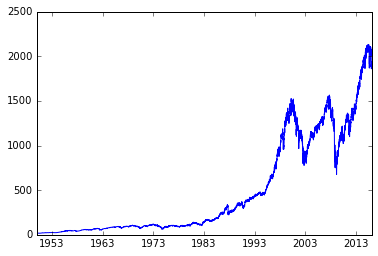

In [15]:
plt.plot(times, GSPCvalues)

Here is a plot of the Log returns. We see the characteristic large fluctuations signalling
the possibility of a power law for the distribution of returns.

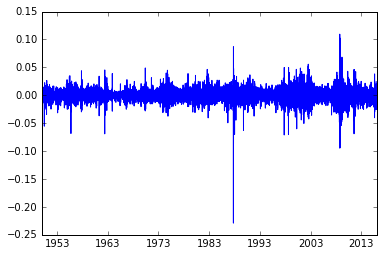

In [18]:
plt.plot(timesOffByOne, logRets)

Below is a plot of Gaussian distributed fluctuations. We see random jumps near the mean, but at far
lower orders of magnitude compared to above.

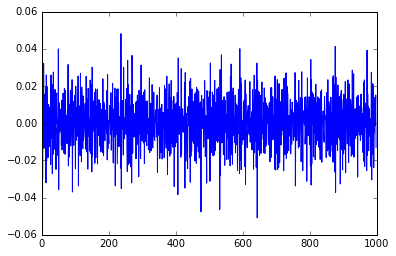

In [21]:
plt.plot(gaussianRets)

In [61]:
popData = pd.read_csv('./data/PEP_2014_PEPANNRSIP.US12A_with_ann.csv')
citiesAndPopulation = popData[['GC_RANK.display-label.1', 'respop72014']]
